In [1]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold  # 导入python的相关模块
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score as ACCS
import pandas as pd
from sklearn import tree
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

# open up a datastore
store = pd.HDFStore('train_data.h5')
store1 = pd.HDFStore('test_data.h5')
# Get the feature matrix (samples and their features)
feature_matrix_dataframe = store['rpkm']  # train的数据框架
feature_matrix_dataframe_test = store1['rpkm']  # test的数据框架

all_in = pd.concat([feature_matrix_dataframe, feature_matrix_dataframe_test], axis=0, join='inner')

name = all_in.index.values  # 提取行标签

data = all_in.values  # 提取数据丢掉标签（总和数据）
sel = VarianceThreshold(threshold=20)  # 表示剔除特征的方差大于阈值15的feature
new = sel.fit_transform(data)  # 返回的结果为选择的特征矩阵
new_all = pd.DataFrame(new, index=name)  # 得到只剩下feature的新数据
a = new_all.iloc[:5, 3]
new_train = new_all.iloc[:21389, ]  # 新的train数据
new_test = new_all.iloc[21389:, ]  # 新的test数据

# 注意，新数据的gene序列（columns）被抹掉了，但是这不重要
# 唯一的问题是所有的数据一起提取方差了


pca = decomposition.PCA(n_components=50)
new_train_afterPCA = pca.fit_transform(new_train.values)
new_test_afterPCA = pca.transform(new_test.values)
# 降维
new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)

labels_series1 = store1['labels']
l1 = labels_series1.values  # l1是test data
# print(l1)
# print(type(l1))
# print(l1.shape)
labels_series = store['labels']
l = labels_series.values  # l是train data


In [7]:
print(new_train_afterPCA_da.shape[1])

50


In [9]:
import seaborn as sns

In [ ]:
#cg = sns.clustermap(feature_matrix_dataframe, cmap='inferno', xticklabels=[], yticklabels=[])
#cg.ax_heatmap.set_xlabel('Genes ({})'.format(feature_matrix_dataframe.shape[1]))
#cg.ax_heatmap.set_ylabel('Cells ({})'.format(feature_matrix_dataframe.shape[0]))

Text(651.9999999999999, 0.5, 'Cells (21389)')

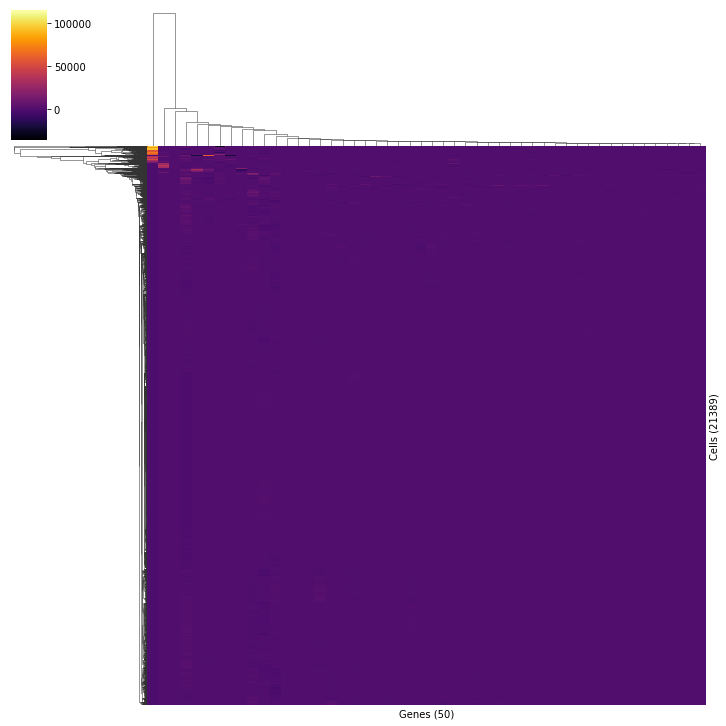

In [8]:
import seaborn as sns

cg = sns.clustermap(new_train_afterPCA_da, cmap='inferno', xticklabels=[], yticklabels=[])
cg.ax_heatmap.set_xlabel('Genes ({})'.format(new_train_afterPCA_da.shape[1]))
cg.ax_heatmap.set_ylabel('Cells ({})'.format(new_train_afterPCA_da.shape[0]))
